# PUJAR DADES A COLAB

In [10]:

import argparse
import torch
from torch import optim
from torchvision import transforms
#from load_data import get_dataloader
#from model import RecognitionModel
#from loss import RecognitionCriterion
#import trainer
import os
import os.path as osp
from google.colab import drive

root_path = 'gdrive/My Drive/2019_AIDL_TEAM4/colab_face_detection_siamesa/Presentacio/Demo/'  #change dir to your project folder
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


**Packages and other variables**

In [0]:
###############################################################################################
# EXECUTAR NOMÉS SI NO DEIXA MONTAR PERQUE QUEDEN DIRECTORIS RESIDUALS DE L'ANTERIOR EXECUCIÓ #
###############################################################################################
import datetime
import shutil
import codecs
import errno
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
import random
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
import torchvision.datasets.mnist
from torchvision import transforms
from tqdm import tqdm
import cv2 
import tqdm
import matplotlib.pyplot as plt3
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from torchvision.models import vgg16_bn
from torchvision.models import alexnet
BorrarDirectori=False

# fixant la seed
seed = 1000

torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

np.random.seed(seed)
random.seed(seed)
 
import random 
random.seed(seed)

if BorrarDirectori:
  shutil.rmtree('/content/gdrive')  

rutaData="D:\\DEEPLEARNING\\redsiamesa\\data2\\"
rutaCode="D:\\DEEPLEARNING\\redsiamesa\\"
rutaWeights="D:\\DEEPLEARNING\\redsiamesa\\"

rutaDataColab="gdrive/My Drive/2019_AIDL_TEAM4/colab_face_detection_siamesa/Presentacio/Demo/Weights_here/"
rutaCodeColab="gdrive/My Drive/2019_AIDL_TEAM4/colab_face_detection_siamesa/Presentacio/Demo/"
rutaWeightsColab="gdrive/My Drive/2019_AIDL_TEAM4/colab_face_detection_siamesa/Presentacio/Demo/Weights_here/"

ampliation=False
best=""
csvest=""
Best=False
EstoyEnColab=1
do_learn = True
basewidth = 224
baseheight = 224
save_frequency = 1  
save_epoch=35
batch_size = 16
lr = 0.00001 # 1e-3  y 5e-4
num_epochs = 50
weight_decay = 0 #  0 y 5*e-4
tipoGD= 1 #1=Adam, 2=SDG
tipoMD="Alexnet" #1=Alexnet, 2=VGGPretrained, 3=VGG
mio=1 
epoch=weightNum=9  
RGBmode="RGB"    
InferenceAccuracyShow=True
besthistory=[]
val_losses=[]
train_losses=[]
val_losses_mean=[]
train_losses_mean=[]
val_accuracy_mean=[]
accuracy_mean=[]
epocas=[]

val_losses_epoch=[]
train_losses_epoch=[]
val_accuracy_epoch=[]
accuracy_epoch=[]

**Load images**

In [0]:
def get_int(b):
   return int(codecs.encode(b, 'hex'), 16)

def read_image_file2(path):
    if EstoyEnColab==0: 
        filesl= np.genfromtxt('%sArtur_Pair_list_F.txt'%rutaData,dtype='str')
    else:
        filesl= np.genfromtxt('%sArtur_Pair_list_F.txt'%rutaDataColab,dtype='str')
        
    train_datai=[]
    train_labelsi=[]
    for jj in range(0,5000): 
        filei=filesl[jj,1][3:]
        catei=int(filesl[jj,1][15:18])
        if EstoyEnColab==0:
            im = Image.open('%scfp-dataset\\%s'%(rutaData,filei) ).convert(RGBmode) 
        else:
            im = Image.open('%scfp-dataset/%s'%(rutaDataColab,filei)).convert(RGBmode)
        width, height = im.size
        #basewidth = 224
        #baseheight = 224
        if width>=height:
            wpercent = (basewidth/float(im.size[0]))
            hsize = int((float(im.size[1])*float(wpercent)))
            im = im.resize((basewidth,hsize), Image.ANTIALIAS)
            im.save('_0.png') 
            width, height =im.size
            if (baseheight-height)%2==0:
                borderType=cv2.BORDER_CONSTANT
                image = cv2.copyMakeBorder(  cv2.imread('_0.png'),  int((baseheight-height)/2) , int((baseheight-height)/2), 0, 0, borderType)
                im = Image.fromarray(image)  
            else:
                borderType=cv2.BORDER_CONSTANT
                image = cv2.copyMakeBorder(  cv2.imread('_0.png'),  int((baseheight-height)/2-0.5) , int((baseheight-height)/2+0.5), 0, 0, cv2.BORDER_CONSTANT,value=[0, 0, 0])
                im = Image.fromarray(image) 
        else:
            wpercent = (baseheight/float(im.size[1]))
            vsize = int((float(im.size[0])*float(wpercent)))
            im = im.resize((vsize,basewidth), Image.ANTIALIAS)
            im.save('_0.png') 
            width, height =im.size
            if (basewidth-width)%2==0:
                borderType=cv2.BORDER_CONSTANT
                image = cv2.copyMakeBorder(  cv2.imread('_0.png') ,   0, 0, int((basewidth-width)/2) , int((basewidth-width)/2),  cv2.BORDER_CONSTANT, borderType)
                im = Image.fromarray(image) 
            else:
                borderType=cv2.BORDER_CONSTANT
                image = cv2.copyMakeBorder( cv2.imread('_0.png'),  0, 0, int((basewidth-width)/2-0.5) , int((basewidth-width)/2+0.5),  cv2.BORDER_CONSTANT,value=[0, 0, 0])
                im = Image.fromarray(image)         
        im
        if jj%250==0:
            print(jj)
        train_datai.append(image)
        train_labelsi.append(catei)
    np.stack(train_datai, axis=0).shape
    np.stack(train_labelsi, axis=0).shape
    train_datai=np.stack(train_datai, axis=0)
    train_labelsi=np.stack(train_labelsi, axis=0)
    train_datai.shape
    train_labelsi.shape
    
    a=torch.from_numpy(train_datai)
    return a

def read_label_file2(path):
    if EstoyEnColab==0:
        filesl= np.genfromtxt('%s/Artur_Pair_list_F.txt'%rutaData,dtype='str')
    else:
        filesl= np.genfromtxt('%s/Artur_Pair_list_F.txt'%rutaDataColab,dtype='str')
    train_labelsi=[]
    for jj in range(0,5000): 
        catei=int(filesl[jj,1][15:18])
        train_labelsi.append(catei)
        if jj%250==0:
            print(jj)
    train_labelsi=np.stack(train_labelsi, axis=0)
    b=torch.from_numpy(train_labelsi)
    return b

class BalancedPair(torch.utils.data.Dataset):
   """samples
   """
   urls = [ 
      '','','',''
   ]
   raw_folder = ''
   processed_folder = ''
   training_file = 'Artur_training.pt'
   test_file = 'Artur_test.pt'
   
   def __init__(self, root, train=True, transform=None, target_transform=None, download=False,vali=False):  #vali es para validation, train =True es para traning, Train=False es para Test
      self.root = os.path.expanduser(root)
      self.transform = transform
      self.target_transform = target_transform
      self.train = train 
       
      if download:
         self.download()
          
      if not self._check_exists():
         raise RuntimeError('Dataset not found.' + ' You can use download=True to download it')   
      if self.train and vali==False:
         self.train_data, self.train_labels = torch.load( os.path.join(self.root, self.processed_folder, self.training_file))
         train_labels_class = []
         train_data_class = []

         for i in range(1,300+1  ):
            indices = torch.squeeze((self.train_labels == i).nonzero())
            train_labels_class.append(torch.index_select(self.train_labels, 0, indices))
            train_data_class.append(torch.index_select(self.train_data, 0, indices)) 
            
         # generate balanced pairs TRAINING
         self.train_data = []
         self.train_labels = [] 
         for i in range(1,  300  ):
            for j in range( 10  ): 
               rnd_cls = random.randint(0, (300-2)  ) 
               if rnd_cls >= i:
                  rnd_cls = rnd_cls + 1 
               rnd_dist = random.randint(0, 100) 
               
               self.train_data.append(torch.stack([train_data_class[i][j], train_data_class[i][(j+rnd_dist)%10   ], train_data_class[rnd_cls][j]]))
               self.train_labels.append([1,0])

         self.train_data = torch.stack(self.train_data)
         self.train_labels = torch.tensor(self.train_labels)

      elif self.train and vali==True:
         self.train_data, self.train_labels = torch.load(
            os.path.join(self.root, self.processed_folder, self.training_file))
        
         train_labels_class = []
         train_data_class = []
         for i in range(300+1,400+1  ):
            indices = torch.squeeze((self.train_labels == i).nonzero())
            train_labels_class.append(torch.index_select(self.train_labels, 0, indices))
            train_data_class.append(torch.index_select(self.train_data, 0, indices))
            
         # generate balanced pairs VALIDATION
         self.train_data = []
         self.train_labels = [] 
         for i in range(1,  100  ):
            for j in range( 10  ): 
               rnd_cls = random.randint(0, (100-2)  ) 
               if rnd_cls >= i:
                  rnd_cls = rnd_cls + 1

               rnd_dist = random.randint(0, 100) 
               self.train_data.append(torch.stack([train_data_class[i][j], train_data_class[i][(j+rnd_dist)%10 if mio==1 else (j+rnd_dist) ], train_data_class[rnd_cls][j]]))
               self.train_labels.append([1,0])

         self.train_data = torch.stack(self.train_data)
         self.train_labels = torch.tensor(self.train_labels)               
      else:
         self.test_data, self.test_labels = torch.load(
            os.path.join(self.root, self.processed_folder, self.test_file))

         test_labels_class = []
         test_data_class = []
         for i in range(400+1,500+1 if mio==1 else  10):
            indices = torch.squeeze((self.test_labels == i).nonzero())
            test_labels_class.append(torch.index_select(self.test_labels, 0, indices))
            test_data_class.append(torch.index_select(self.test_data, 0, indices))
            
         # generate balanced pairs TEST
         self.test_data = []
         self.test_labels = [] 
         for i in range( 1, 100 ):
            for j in range( 10 ):
               rnd_cls = random.randint(0, (100-2) if mio==1 else (10-2) )
               if rnd_cls >= i:
                  rnd_cls = rnd_cls + 1 
               rnd_dist = random.randint(0, 100) 
               self.test_data.append(torch.stack([test_data_class[i][j], test_data_class[i][(j+rnd_dist)%10 if mio==1 else (j+rnd_dist) ], test_data_class[rnd_cls][j]]))
               self.test_labels.append([1,0])

         self.test_data = torch.stack(self.test_data)
         self.test_labels = torch.tensor(self.test_labels)
        
   def __getitem__(self, index):
      if self.train:
         imgs, target = self.train_data[index], self.train_labels[index]
      else:
         imgs, target = self.test_data[index], self.test_labels[index]
        
      img_ar = []
      for i in range(len(imgs)):
         img = Image.fromarray(imgs[i].numpy(), mode=RGBmode)
         if self.transform is not None:
            img = self.transform(img)
         img_ar.append(img)
         
      if self.target_transform is not None:
         target = self.target_transform(target)
        
      return img_ar, target
  
   def __len__(self):
      if self.train:
         return len(self.train_data)
      else:
         return len(self.test_data)
      
   def _check_exists(self):  
      return os.path.exists(os.path.join(self.root, self.processed_folder, self.test_file))
  
   def download(self): 
      from six.moves import urllib
      import gzip 
      if self._check_exists(): 
         return 
      try:
         os.makedirs(os.path.join(self.root, self.raw_folder))
         os.makedirs(os.path.join(self.root, self.processed_folder))
      except OSError as e:
         if e.errno == errno.EEXIST:
            pass
         else:
            raise
            
      training_set = (
         read_image_file2(os.path.join('')),
         read_label_file2(os.path.join(''))  )
      test_set = (
         read_image_file2(os.path.join('')),
         read_label_file2(os.path.join('')) )
      
      with open(os.path.join(self.root, self.processed_folder, self.training_file), 'wb') as f:
         torch.save(training_set, f)
      with open(os.path.join(self.root, self.processed_folder, self.test_file), 'wb') as f:
         torch.save(test_set, f)
        

   def __repr__(self):
      fmt_str = 'Dataset ' + self.__class__.__name__ + '\n'
      fmt_str += '    Number of datapoints: {}\n'.format(self.__len__())
      tmp = 'train' if self.train is True else 'test'
      fmt_str += '    Split: {}\n'.format(tmp)
      fmt_str += '    Root Location: {}\n'.format(self.root)
      tmp = '    Transforms (if any): '
      fmt_str += '{0}{1}\n'.format(tmp, self.transform.__repr__().replace('\n', '\n' + ' ' * len(tmp)))
      tmp = '    Target Transforms (if any): '
      fmt_str += '{0}{1}'.format(tmp, self.target_transform.__repr__().replace('\n', '\n' + ' ' * len(tmp)))
      return fmt_str



**Models**

In [0]:
class AlexNet(nn.Module):  
    def __init__(self):      
            super().__init__()
            #self.feat=alexnet(pretrained=pretrained).features
            self.conv1 = nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2)   
            self.pool1 = nn.MaxPool2d(kernel_size=3, stride=2)
            self.conv2 = nn.Conv2d(64, 192, kernel_size=5, padding=2)
            self.pool2 = nn.MaxPool2d(kernel_size=3, stride=2)
            self.conv3 = nn.Conv2d(192, 384, kernel_size=3, padding=1)
            self.conv4 = nn.Conv2d(384, 256, kernel_size=3, padding=1)
            self.conv5 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
            self.pool3 = nn.MaxPool2d(kernel_size=3, stride=2)
            self.pool4 = self.avgpool = nn.AdaptiveAvgPool2d((6, 6))
            self.linear1 = nn.Linear(256 * 6 * 6, 4096)
            self.linear2 = nn.Linear(4096, 4096)
            self.linear3 = nn.Linear(4096, 2)

    def forward(self, data):
        res = []
        for i in range(2): # Siamesa
            x=data[i]
            x = self.conv1(x)
            x = F.relu(x)
            x = self.pool1(x) 
            x = self.conv2(x)
            x = F.relu(x)
            x = self.pool2(x) 
            x = self.conv3(x)
            x = F.relu(x)
            x = self.conv4(x)
            x = F.relu(x)
            x = self.conv5(x)
            x = F.relu(x)
            x = self.pool3(x) 
            x = self.pool4(x)  
            x = x.view(x.shape[0], -1)  
            res.append(F.relu(x))
        res = torch.abs(res[1] - res[0]) 
        res = self.linear1(res)
        res = F.relu(res) 
        res = self.linear2(res)
        res = F.relu(res) 
        res = self.linear3(res) 
        return res   
class AlexnetDecision(nn.Module):
    """
    Siamese network
    """
    def __init__(self, pretrained=False):
        super(AlexnetDecision, self).__init__()
        self.feat = alexnet(pretrained=pretrained).features
        self.decision_network = nn.Sequential(
            nn.Linear(in_features=2*256 * 6 * 6, out_features=4096), 
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(in_features=4096, out_features=4096),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(in_features=4096, out_features=2)        )

    def forward(self, data):
        res=[]
        img1=data[0]
        img2=data[1]
        feat_1 = self.feat(img1).view(img1.size(0),-1)
        res.append(F.relu(feat_1))
        feat_2 = self.feat(img2).view(img2.size(0),-1)
        res.append(F.relu(feat_2))
        feat = torch.cat((feat_1, feat_2), 1)
        return self.decision_network(feat)
      
class SiameseDecision(nn.Module):
    """
    Siamese network
    """
    def __init__(self, pretrained=False):
        super(SiameseDecision, self).__init__()
        self.feat = vgg16_bn(pretrained=pretrained).features
        self.decision_network = nn.Sequential(
            nn.Linear(in_features=512*7*7*2, out_features=4096),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(in_features=4096, out_features=4096),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(in_features=4096, out_features=2)        )

    def forward(self, data):
        res=[]
        img1=data[0]
        img2=data[1]
        feat_1 = self.feat(img1).view(img1.size(0),-1)
        res.append(F.relu(feat_1))
        feat_2 = self.feat(img2).view(img2.size(0),-1)
        res.append(F.relu(feat_2))
        feat = torch.cat((feat_1, feat_2), 1)
        return self.decision_network(feat)

class VGGSiameseNet(nn.Module):
    def __init__(self,pretrained=False):
        super(VGGSiameseNet, self).__init__()
        vgg16_model = vgg16_bn(pretrained=pretrained)
        self.feat = vgg16_model.features
        self.linear_classifier = vgg16_model.classifier[0]
 
        self.avgpool1 = nn.AdaptiveAvgPool2d((7, 7))
        self.avgpool2 = nn.AdaptiveAvgPool2d((7, 7))  # TODO It is not necessary two different avgpools
        self.linear1 = nn.Linear(25088, 4096)
        self.linear2 = nn.Linear(4096, 4096)
        self.linear3 = nn.Linear(4096, 2)
 
    def forward(self, data):
        res=[]
        x1 = data[0]
        x2 = data[1]
 
        out1 = self.feat(x1)
        out1 = self.avgpool1(out1)
        out1 = out1.view(out1.size(0), -1) 
        res.append(F.relu(out1))
 
        out2 = self.feat(x2)
        out2 = self.avgpool2(out2)
        out2 = out2.view(out2.size(0), -1)
        res.append(F.relu(out2))
        
        res = torch.abs(res[1] - res[0])
        res = self.linear1(res)
        res = F.relu(res)
        res = self.linear2(res)
        res = F.relu(res)
        res = self.linear3(res) 
        
        return res
 
#alexnet = models.alexnet(pretrained=True)





**Train**

In [0]:
def train(model, device, train_loader,val_loader, epoch, optimizer):
    model.train()
    # empty 
    global train_losses
    global val_losses 
    global Best
    global epocas
    accurate_labels = 0
    all_labels = 0
    ep_val_losses_epoch=[]
    ep_train_losses_epoch=[]
    ep_val_accuracy_epoch=[]
    ep_accuracy_epoch=[]
    for batch_idx, (data, target) in enumerate(train_loader):
      for i in range(len(data)):
         data[i] = data[i].to(device) 
      
      optimizer.zero_grad()
      output_positive = model(data[:2])
      output_negative = model(data[0:3:2])
      
      target = target.type(torch.LongTensor).to(device)
      target_positive = torch.squeeze(target[:,0])
      target_negative = torch.squeeze(target[:,1])
      
      loss_positive = F.cross_entropy(output_positive, target_positive)
      loss_negative = F.cross_entropy(output_negative, target_negative)
      
      loss = (loss_positive + loss_negative)/2
      accurate_labels_positive = torch.sum(torch.argmax(output_positive, dim=1) == target_positive).cpu()
      accurate_labels_negative = torch.sum(torch.argmax(output_negative, dim=1) == target_negative).cpu()
      accurate_labels = accurate_labels + accurate_labels_positive + accurate_labels_negative
      all_labels = all_labels + len(target_positive) + len(target_negative)
      
      loss.backward()
      
      optimizer.step()
      if batch_idx%30==0 :
        #initialize   
        model.eval()
        tmp_losses = []  
        with torch.no_grad(): 
          val_accurate_labels = 0
          val_all_labels = 0
          val_loss = 0
          for val_batch_idx, (val_data, val_target) in enumerate(val_loader): 
              for i in range(  len(val_data) ):
                val_data[i] = val_data[i].to(device)
              # get the validation output
              val_output_positive = model(val_data[:2])
              val_output_negative = model(val_data[0:3:2])
              val_target = val_target.type(torch.LongTensor).to(device)
              val_target_positive = torch.squeeze(val_target[:,0])
              val_target_negative = torch.squeeze(val_target[:,1])
              # get the validation loss
              val_loss_positive = F.cross_entropy(val_output_positive, val_target_positive)
              val_loss_negative = F.cross_entropy(val_output_negative, val_target_negative)
              val_loss = (val_loss_positive + val_loss_negative)/2
              # append the validation loss 
              val_accurate_labels_positive = torch.sum(torch.argmax(val_output_positive, dim=1) == val_target_positive).cpu()
              val_accurate_labels_negative = torch.sum(torch.argmax(val_output_negative, dim=1) == val_target_negative).cpu()

              val_accurate_labels = val_accurate_labels + val_accurate_labels_positive + val_accurate_labels_negative
              val_all_labels = val_all_labels + len(val_target_positive) + len(val_target_negative)

          val_accuracy = 100. * val_accurate_labels / val_all_labels  
          accuracy = 100. * accurate_labels / all_labels  
           
          val_losses.append(val_loss.item())
          train_losses.append(loss.item())
          
          ep_val_losses_epoch.append(val_loss.item())
          ep_train_losses_epoch.append(loss.item())
          ep_val_accuracy_epoch.append(val_accuracy.item())
          ep_accuracy_epoch.append(accuracy.item())
          
          print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}\tValLoss: {:.6f}\tTrainAccuracy: {:.6f}\tValAccuracy: {:.6f}'.format(
            epoch, batch_idx*batch_size, len(train_loader.dataset), 100. * batch_idx*batch_size / len(train_loader.dataset),
            np.mean(train_losses), np.mean(val_losses), accuracy, val_accuracy ))
          val_losses_mean.append(np.mean(val_losses))
          train_losses_mean.append(np.mean(train_losses))
          val_accuracy_mean.append(np.mean(val_accuracy.item())) 
          accuracy_mean.append(np.mean(accuracy.item()))
          epocas.append(epoch)
    if len(val_losses_epoch)==0:
      valtemp=999
    else:
      valtemp=val_losses_epoch[-1]      
    val_losses_epoch.append(np.mean(val_losses_mean))
    train_losses_epoch.append(np.mean(train_losses_mean))
    val_accuracy_epoch.append(np.mean(ep_val_accuracy_epoch))
    accuracy_epoch.append(np.mean(ep_accuracy_epoch)) 
    if valtemp>val_losses_epoch[-1]:
      Best=True 


**Test**

In [0]:
def test(model, device, test_loader):
   model.eval()
   
   with torch.no_grad():
      accurate_labels = 0
      all_labels = 0
      loss = 0
      for batch_idx, (data, target) in enumerate(test_loader):
         for i in range(len(data)):
            data[i] = data[i].to(device)
            
         output_positive = model(data[:2])
         output_negative = model(data[0:3:2])
            
         target = target.type(torch.LongTensor).to(device)
         target_positive = torch.squeeze(target[:,0])
         target_negative = torch.squeeze(target[:,1])
            
         loss_positive = F.cross_entropy(output_positive, target_positive)
         loss_negative = F.cross_entropy(output_negative, target_negative) 
         loss = loss + loss_positive + loss_negative
            
         accurate_labels_positive = torch.sum(torch.argmax(output_positive, dim=1) == target_positive).cpu()
         accurate_labels_negative = torch.sum(torch.argmax(output_negative, dim=1) == target_negative).cpu()
            
         accurate_labels = accurate_labels + accurate_labels_positive + accurate_labels_negative
         all_labels = all_labels + len(target_positive) + len(target_negative)
      
      accuracy = 100. * accurate_labels / all_labels
      #print('Test (all test data) accuracy: {}/{} ({:.3f}%)\tLoss: {:.6f}'.format(accurate_labels, all_labels, accuracy, loss))
      print('Test (all test data) accuracy: {}/{} ({:.3f}%)'.format(accurate_labels, all_labels, accuracy))
   
def oneshot(model, device, data):
   model.eval()
   with torch.no_grad():
      for i in range(len(data)):
            data[i] = data[i].to(device)      
      output = model(data)
      return torch.squeeze(torch.argmax(output, dim=1)).cpu().item()
    


**Main**

In [0]:
def main():
   
   global epoch
   global Best
   global best
   global csvest
   global epocas
#   device = torch.device('cpu')
   device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
   trans4=transforms.Compose([transforms.ToTensor()])
   trans5 =transforms.Compose([  
        transforms.RandomHorizontalFlip(),
        transforms.RandomAffine(degrees=0,translate=(0.125, 0.125)),
        transforms.ToTensor()
    ])
   if ampliacion==True:
      mitrans=trans5
   else:
      mitrans=trans4
   if tipoMD=="Alexnet" and pretrained==False: 
      model = AlexNet().to(device) #modelo Alexnet
   elif tipoMD=="Alexnet" and pretrained==True: 
      model = AlexnetDecision().to(device) #modelo Alexnet
   elif tipoMD=="VGG" and pretrained==False:
      model = SiameseDecision(pretrained=False).to(device) #modelo vgg no preentrenado con concat
   elif tipoMD=="VGG" and pretrained==True:
      model = SiameseDecision(pretrained=True).to(device) #modelo vgg preentrenado con concat
   elif tipoMD=="VGG2" and pretrained==False:
      model = VGGSiameseNet(pretrained=False).to(device) #modelo vgg no preentrenado con suma
   elif tipoMD=="VGG2" and pretrained==True:
      model = VGGSiameseNet(pretrained=True).to(device) #modelo vgg preentrenado con suma   
   
   
   if freezing==True: 
        print("State of the features layers: \n")
        for name, child in model.feat.named_children():
          for name_2, params in child.named_parameters():
            print(child, name_2, params.requires_grad)
        nConv = nConvFR # Num de conv layers que queremos congelar
        features_freezed = 0
        for name, child in model.feat.named_children():
           if features_freezed < nConv:
            if isinstance(child,torch.nn.modules.conv.Conv2d): features_freezed+=1
            for name2, params in child.named_parameters():
              params.requires_grad = False 
              model = model.to('cuda:0')
   if do_learn: # training mode
      if EstoyEnColab==0:
          train_loader = torch.utils.data.DataLoader(BalancedPair('%s'%rutaData, train=True, download=True, transform=mitrans,vali=False), batch_size=batch_size, shuffle=True)
          val_loader = torch.utils.data.DataLoader(BalancedPair('%s'%rutaData, train=True, download=True, transform=mitrans,vali=True), batch_size=batch_size, shuffle=True)
          test_loader = torch.utils.data.DataLoader(BalancedPair('%s'%rutaData, train=False, download=True, transform=mitrans,vali=True), batch_size=batch_size, shuffle=False)
      else:
          train_loader = torch.utils.data.DataLoader(BalancedPair('%s'%rutaDataColab, train=True, download=True, transform=mitrans,vali=False), batch_size=batch_size, shuffle=True)
          val_loader = torch.utils.data.DataLoader(BalancedPair('%s'%rutaDataColab, train=True, download=True, transform=mitrans,vali=True), batch_size=batch_size, shuffle=True)
          test_loader = torch.utils.data.DataLoader(BalancedPair('%s'%rutaDataColab, train=False, download=True, transform=mitrans,vali=True), batch_size=batch_size, shuffle=False)

      optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
      for epoch in range(num_epochs):
         train(model, device, train_loader,val_loader, epoch, optimizer)
         #vali(model, device, test_loader)
         test(model, device, test_loader)
         #if (epoch== save_epoch):
         if EstoyEnColab==0:
            torch.save(model, ('%ssiamese_epoch{:3}__model{:6}_amp{:3}_pretr{:3}_lr{:6}_wd{:3}.pt'%rutaWeights).format(epoch,tipoMD,ampliacion,pretrained*1,lr,weight_decay))   
         else:
            if Best==True:
              if best=="":
                torch.save(model, ('%ssiamese_epoch{:3}__model{:6}_amp{:3}_pretr{:3}_lr{:6}_wd{:3}.pt'%rutaWeightsColab).format(epoch,tipoMD,ampliacion,pretrained*1,lr,weight_decay))
                pd.DataFrame({"epoch":epocas, "tl":train_losses_mean,"vl":val_losses_mean,"al":accuracy_mean,"val":val_accuracy_mean}).to_csv(('%strain_losses_epoch{:3}__model{:6}_amp{:3}_pretr{:3}_lr{:6}_wd{:3}.csv'%rutaWeightsColab).format(epoch,tipoMD,ampliacion,pretrained*1,lr,weight_decay),sep=';',  decimal=',')
                best=('%ssiamese_epoch{:3}__model{:6}_amp{:3}_pretr{:3}_lr{:6}_wd{:3}.pt'%rutaWeightsColab).format(epoch,tipoMD,ampliacion,pretrained*1,lr,weight_decay)
                csvest=('%strain_losses_epoch{:3}__model{:6}_amp{:3}_pretr{:3}_lr{:6}_wd{:3}.csv'%rutaWeightsColab).format(epoch,tipoMD,ampliacion,pretrained*1,lr,weight_decay)
              else:
                os.remove(best)
                os.remove(csvest)
                best=('%ssiamese_epoch{:3}__model{:6}_amp{:3}_pretr{:3}_lr{:6}_wd{:3}.pt'%rutaWeightsColab).format(epoch,tipoMD,ampliacion,pretrained*1,lr,weight_decay)
                csvest=('%strain_losses_epoch{:3}__model{:6}_amp{:3}_pretr{:3}_lr{:6}_wd{:3}.csv'%rutaWeightsColab).format(epoch,tipoMD,ampliacion,pretrained*1,lr,weight_decay)
                torch.save(model, ('%ssiamese_epoch{:3}__model{:6}_amp{:3}_pretr{:3}_lr{:6}_wd{:3}.pt'%rutaWeightsColab).format(epoch,tipoMD,ampliacion,pretrained*1,lr,weight_decay))
                pd.DataFrame({"epoch":epocas, "tl":train_losses_mean,"vl":val_losses_mean,"al":accuracy_mean,"val":val_accuracy_mean}).to_csv(('%strain_losses_epoch{:3}__model{:6}_amp{:3}_pretr{:3}_lr{:6}_wd{:3}.csv'%rutaWeightsColab).format(epoch,tipoMD,ampliacion,pretrained*1,lr,weight_decay),sep=';',  decimal=',')
                besthistory.append([epoch,tipoMD,lr,weight_decay,val_losses_mean[-1],train_losses_mean[-1],val_accuracy_mean[-1],accuracy_mean[-1]])
                Best=False
            
      # save last          
      if EstoyEnColab==0:
          torch.save(model, ('%ssiamese_{:03}.pt'%rutaData).format(epoch))
      else:
          torch.save(model, ('%ssiamese_epoch{:3}__model{:6}_amp{:3}_pretr{:3}_lr{:6}_wd{:3}.pt'%rutaWeightsColab).format(epoch,tipoMD,ampliacion,pretrained*1,lr,weight_decay))

      f = plt.figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
      f.add_subplot(1,2, 1)
      plt.plot(train_losses_epoch)
      plt.plot(val_losses_epoch)
      plt.legend(["Train", "Validation"])
      f.add_subplot(1,2, 2)
      plt.plot(accuracy_epoch)
      plt.plot(val_accuracy_epoch)
      plt.legend(["TrainAccuracy","ValAccuracy"])
      pd.DataFrame({"epoch":epocas, "tl":train_losses_mean,"vl":val_losses_mean,"al":accuracy_mean,"val":val_accuracy_mean}).to_csv(('%strain_losses_epoch{:3}__model{:6}_amp{:3}_pretr{:3}_lr{:6}_wd{:3}.csv'%rutaWeightsColab).format(epoch,tipoMD,ampliacion,pretrained*1,lr,weight_decay),sep=';',  decimal=',')
     
   else: # prediction  
      if EstoyEnColab==0:
          load_model_path=('%sArtur_weights_siamese_epoch{:3}_{:3}_model{:6}_lr{:6}_wd{:3}.pt'%rutaWeights).format(epoch,ampliacion,pretrained*1,tipoMD,lr,weight_decay)          
          prediction_loader = torch.utils.data.DataLoader(BalancedPair('%s'%rutaData, train=False, download=True, transform=trans4), batch_size=1, shuffle=True)
      else:
          load_model_path=('%sArtur_weights_siamese_epoch{:3}__model{:6}_amp{:3}_pretr{:3}_lr{:6}_wd{:3}.pt'%rutaWeightsColab).format(epoch,tipoMD,ampliacion,pretrained*1,lr,weight_decay)
          prediction_loader = torch.utils.data.DataLoader(BalancedPair('%s'%rutaDataColab, train=False, download=True, transform=trans4), batch_size=1, shuffle=True)
          
      model = torch.load(load_model_path)      
      if InferenceAccuracyShow==True:
        if EstoyEnColab==0: 
            test_loader = torch.utils.data.DataLoader(BalancedPair('%s'%rutaData, train=False, download=True, transform=trans4,vali=True), batch_size=batch_size, shuffle=False)
        else: 
            test_loader = torch.utils.data.DataLoader(BalancedPair('%s'%rutaDataColab, train=False, download=True, transform=trans4,vali=True), batch_size=batch_size, shuffle=False)
        test(model, device, test_loader)
      for i in range(0,5):
        data = []
        datab = []
        data.extend(next(iter(prediction_loader))[0][:3:2]) 
        datab.extend(next(iter(prediction_loader))[0][:2:1])

        def rescale(arr):
          arr_min = arr.min()
          arr_max = arr.max()
          return (arr - arr_min) / (arr_max - arr_min)
        def parejas(datas):
          img1=np.array(datas[0][0])  
          arr1 = np.zeros((basewidth,baseheight, 3))
          arr1[:,:,0] = img1[2,:,:]
          arr1[:,:,1] = img1[1,:,:]
          arr1[:,:,2] = img1[0,:,:]      
          arr1 = 255.0 * rescale(arr1)
          img2=np.array(datas[1][0]) 
          arr2 = np.zeros((basewidth,baseheight, 3))
          arr2[:,:,0] = img2[2,:,:]
          arr2[:,:,1] = img2[1,:,:]
          arr2[:,:,2] = img2[0,:,:]      
          arr2 = 255.0 * rescale(arr2) 
          f = plt.figure()
          f.add_subplot(1,2, 1)
          plt.imshow(arr1.astype(int))
          f.add_subplot(1,2, 2)
          plt.imshow(arr2.astype(int))
          plt.show(block=True)
          same = oneshot(model, device, datas)
          if same > 0:
             print('The same person') 
          else:
             print('NOT of the same person') 
        #print(data[0].shape)
        parejas(data)
        parejas(datab)
      
      
          


**Demo: Alexnet with Data aumentation lr 1e-5 wd0**

Test (all test data) accuracy: 1641/1980 (82.000%)


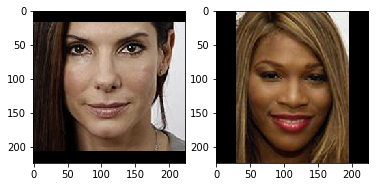

NOT of the same person


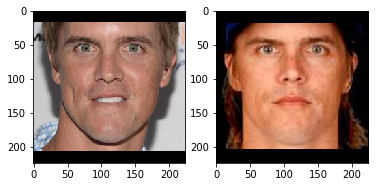

The same person


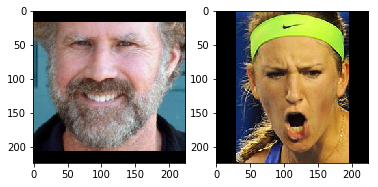

NOT of the same person


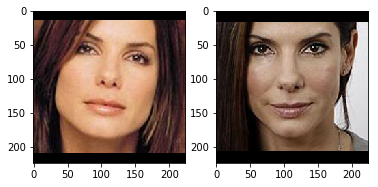

The same person


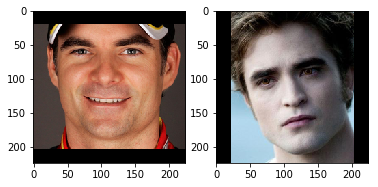

NOT of the same person


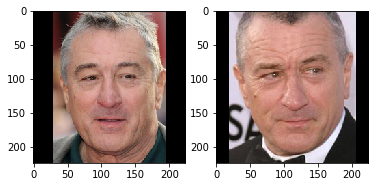

The same person


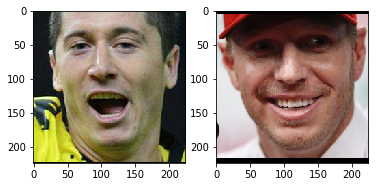

The same person


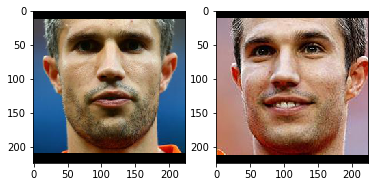

The same person


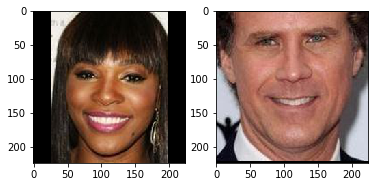

NOT of the same person


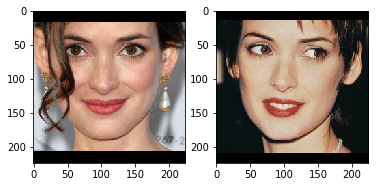

The same person
Tiempo de ejecución:  0:00:19.219640


In [9]:
###############################################################################################
# ALEXNET AMB PREENTRENAMENT I SENSE DATA AUGMENTATION   EPOCH OPTIM 59                       #
###############################################################################################

timea=datetime.datetime.now()
rutaWeightsColab="gdrive/My Drive/2019_AIDL_TEAM4/colab_face_detection_siamesa/Presentacio/Demo/Weights_here/"
pretrained=False
tipoMD="Alexnet"
ampliacion=True
lr = 0.00001
weight_decay = 0
batch_size = 16 
InferenceAccuracyShow=True
do_learn = False
epoch=weightNum=59
batch_size = 16
freezing=False
main() 
print("Tiempo de ejecución: ",datetime.datetime.now()-timea)